In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

sp500_tickers = ["AAPL"]  # List of S&P500 tickers
df = yf.download(sp500_tickers, start="2010-01-01", end="2024-01-31", group_by="ticker")


[*********************100%***********************]  1 of 1 completed


In [64]:
df.head()

Ticker                         AAPL                                          \
Price                          Open      High       Low     Close Adj Close   
Date                                                                          
2010-01-04 00:00:00+00:00  7.622500  7.660714  7.585000  7.643214  6.447412   
2010-01-05 00:00:00+00:00  7.664286  7.699643  7.616071  7.656429  6.458558   
2010-01-06 00:00:00+00:00  7.656429  7.686786  7.526786  7.534643  6.355827   
2010-01-07 00:00:00+00:00  7.562500  7.571429  7.466071  7.520714  6.344075   
2010-01-08 00:00:00+00:00  7.510714  7.571429  7.466429  7.570714  6.386254   

Ticker                                
Price                         Volume  
Date                                  
2010-01-04 00:00:00+00:00  493729600  
2010-01-05 00:00:00+00:00  601904800  
2010-01-06 00:00:00+00:00  552160000  
2010-01-07 00:00:00+00:00  477131200  
2010-01-08 00:00:00+00:00  447610800

In [65]:
df.columns = df.columns.droplevel('Ticker') # run only once
df.columns = df.columns.rename(None) # drop price as a label
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,7.622500,7.660714,7.585000,7.643214,6.447412,493729600
2010-01-05 00:00:00+00:00,7.664286,7.699643,7.616071,7.656429,6.458558,601904800
2010-01-06 00:00:00+00:00,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
2010-01-07 00:00:00+00:00,7.562500,7.571429,7.466071,7.520714,6.344075,477131200
2010-01-08 00:00:00+00:00,7.510714,7.571429,7.466429,7.570714,6.386254,447610800


In [66]:
df = df[['Open','Close']] 
df.head()

,Open,Close
Date,,
2010-01-04 00:00:00+00:00,7.622500,7.643214
2010-01-05 00:00:00+00:00,7.664286,7.656429
2010-01-06 00:00:00+00:00,7.656429,7.534643
2010-01-07 00:00:00+00:00,7.562500,7.520714
2010-01-08 00:00:00+00:00,7.510714,7.570714


In [67]:
df.index = pd.to_datetime(df.index).date

df.head()

,Open,Close
2010-01-04,7.622500,7.643214
2010-01-05,7.664286,7.656429
2010-01-06,7.656429,7.534643
2010-01-07,7.562500,7.520714
2010-01-08,7.510714,7.570714


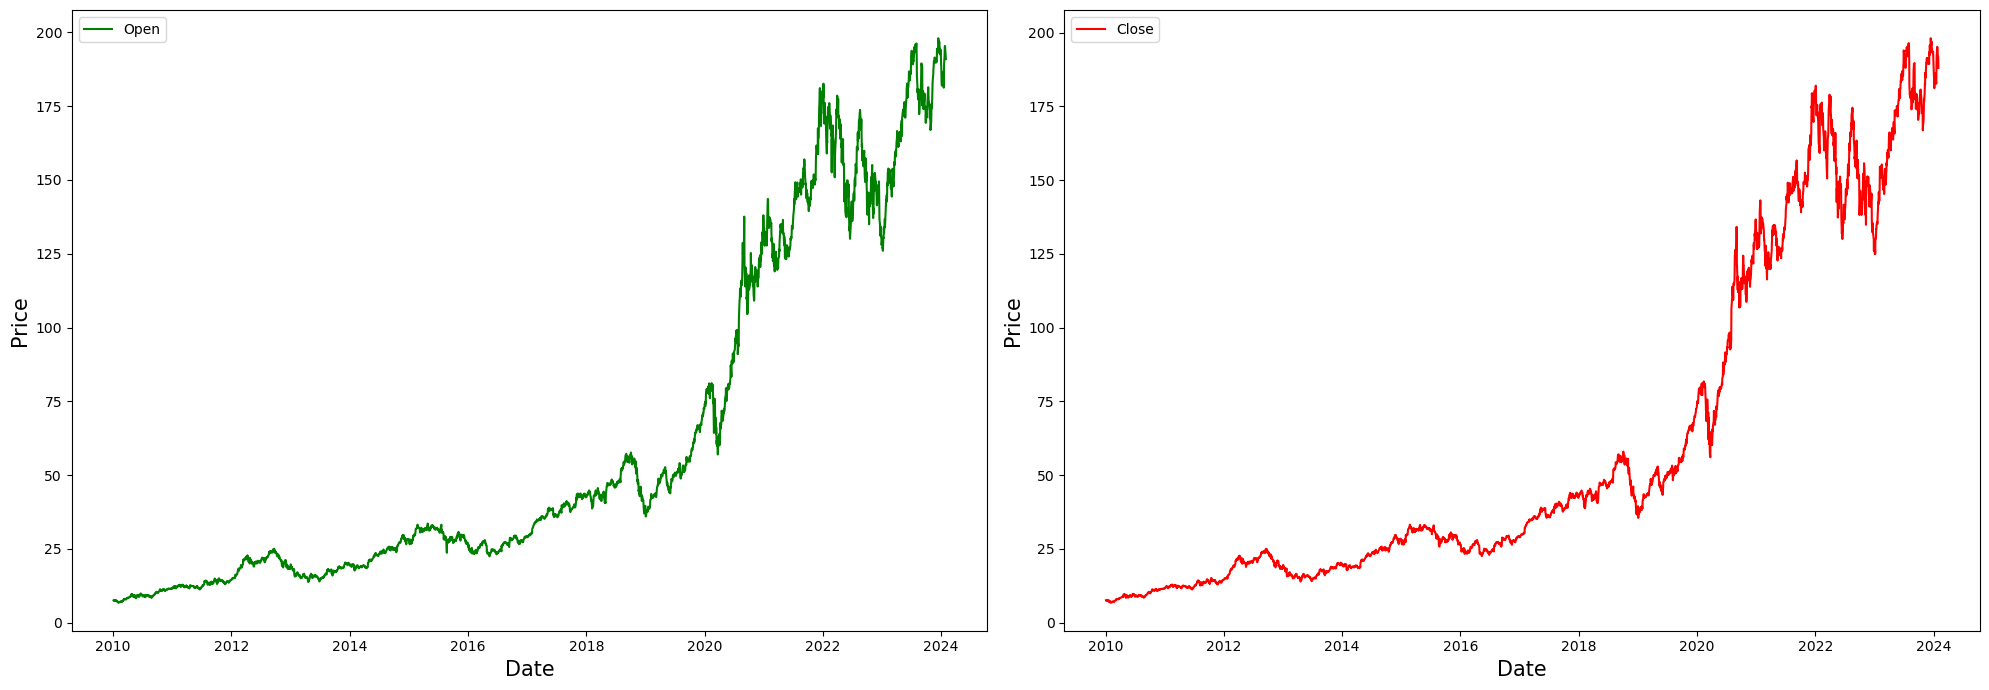

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot the 'Open' price on the first subplot (ax[0])
ax[0].plot(df.index, df['Open'], label='Open', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

# Plot the 'Close' price on the second subplot (ax[1])
ax[1].plot(df.index, df['Close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df has 'Open', 'Close', etc., and 'Date' is already the index

# Step 1: Ensure the index is in datetime format (in case it's not)
df.index = pd.to_datetime(df.index)

# Step 2: Scale the data (apply MinMaxScaler to numeric columns)
Ms = MinMaxScaler()
df[df.columns] = Ms.fit_transform(df)

# Step 3: Split the data based on the date range
# Training data: From 2010 to 2023
train_data = df['2010-01-01':'2023-12-31']

# Test data: From January 2024 onwards
test_data = df['2024-01-01':]

# Display the shapes for verification
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (3522, 2)
Test data shape: (20, 2)


In [76]:
import numpy as np

def create_sequence(dataset, seq_length=10): # se for 50, o test size e demasiado pequeno
    sequences = []
    labels = []

    for stop_idx in range(seq_length, len(dataset)):  # Starting from seq_length to the end of the dataset
        start_idx = stop_idx - seq_length  # Get the starting index for the sequence

        # Extract the sequence (a window of 50 time steps)
        sequences.append(dataset.iloc[start_idx:stop_idx].values)  # Extract the values for the sequence
        labels.append(dataset.iloc[stop_idx]['Close'])  # The label is the 'close' price of the next day

    return np.array(sequences), np.array(labels)

# Create sequences for train_data and test_data
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

# Check the shape of the sequences and labels
print(f"Train sequences shape: {train_seq.shape}, Train labels shape: {train_label.shape}")
print(f"Test sequences shape: {test_seq.shape}, Test labels shape: {test_label.shape}")


Train sequences shape: (3512, 10, 2), Train labels shape: (3512,)
Test sequences shape: (10, 10, 2), Test labels shape: (10,)


In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Adjusted LSTM model with sequence length 10
model = Sequential()

# First LSTM layer (Bidirectional can be added as an optional enhancement)
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))  # Dropout layer for regularization

# Second LSTM layer
model.add(LSTM(units=50))

# Output layer - predicting 1 values (close)
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Print model summary to verify architecture
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 10, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.fit(train_seq, train_label, epochs=80, validation_data=(test_seq, test_label), verbose=1)


Epoch 1/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0800 - val_loss: 0.0015 - val_mean_absolute_error: 0.0331
Epoch 2/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0653e-04 - mean_absolute_error: 0.0118 - val_loss: 4.3475e-04 - val_mean_absolute_error: 0.0177
Epoch 3/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.1332e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0018 - val_mean_absolute_error: 0.0365
Epoch 4/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5144e-04 - mean_absolute_error: 0.0110 - val_loss: 7.7556e-04 - val_mean_absolute_error: 0.0250
Epoch 5/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1379e-04 - mean_absolute_error: 0.0134 - val_loss: 9.7889e-04 - val_mean_absolute_error: 0.0279
Epoch 6/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7321e-04 - mean_absolute_error: 0.0111 - val_loss: 9.8747e-04 - val_mean_absolute_error: 0.0280
Epoch 7/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.93

In [89]:
# Get the model's predictions (assuming it's just predicting 'Close')
test_predicted = model.predict(test_seq)

# If the model is predicting only 'Close', reshape it so that it matches the scaler's expectations
# The scaler was fit on 2 features, so we add a second column (dummy column for 'Open')
test_predicted_reshaped = np.hstack((np.zeros((test_predicted.shape[0], 1)), test_predicted))  # Add dummy 'Open' column

# Inverse transform the predicted values (now in shape [10, 2])
test_inverse_predicted = Ms.inverse_transform(test_predicted_reshaped)

# Extract only the 'Close' values from the inverse transformed data
test_inverse_predicted = test_inverse_predicted[:, 1]  # Extract only the 'Close' column (index 1)

print(test_inverse_predicted.shape)  # Should be (10,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(10,)


In [102]:
import numpy as np

# Assuming the 'test_inverse_predicted' contains only predicted 'Close' values.
# and 'df' contains the actual Apple stock data with 'Close' prices.

# Create a DataFrame for the predicted 'Close' values
predicted_data = pd.DataFrame(test_inverse_predicted, columns=['close_predicted'], index=df.iloc[-len(test_inverse_predicted):].index)

# Merge actual and predicted 'Close' data for better visualization
apple_stock_data = pd.concat([df.iloc[-len(test_inverse_pWedicted):].copy(), predicted_data], axis=1)

# Ensure the correct shape for inverse transformation: 
# Add a dummy column for 'Open' (as the scaler was fitted with both 'Open' and 'Close')
# We only need to do this for the 'Close' column
apple_stock_data[['Close']] = Ms.inverse_transform(
    np.hstack((np.zeros((apple_stock_data[['Close']].shape[0], 1)), apple_stock_data[['Close']].values))
)

# Apply inverse transformation to predicted 'close' (adding a dummy 'Open' column)
apple_stock_data[['close_predicted']] = Ms.inverse_transform(
    np.hstack((np.zeros((apple_stock_data[['close_predicted']].shape[0], 1)), apple_stock_data[['close_predicted']].values))
)

# Display the final merged data with actual and predicted 'Close' prices
print(apple_stock_data[['Close', 'close_predicted']].head())


ValueError: Columns must be same length as key

In [70]:
-
















































-

SyntaxError: invalid syntax (1791477517.py, line 1)

## 1. Extract Data for Selected Features

The dataframe has a **multi-index structure**:

- The **index** is "Date".
- Columns are a MultiIndex with:
    - **Level 1**: "Ticker" symbols (e.g., MSFT, GOOGL, AAPL, ...)
    - **Level 2**: "Features" (Open, High, Low, Close, Adj Close, Volume)
---
The following code does the following:
1. **Get the List of Tickers**: Extracts all unique tickers from the MultiIndex columns).

2. **Loop Through Each Ticker**.

3. **Add a Ticker Column** (to identify the data's stock ticker).

4. **Combine Data for All Tickers**: Concatenates the processed data for all tickers into a single DataFrame (`processed_data`).

5. **Reset Index**: Resets the DataFrame index for clarity.



In [ ]:
tickers = data.columns.get_level_values(0).unique() # list of tickers
selected_features = ['Open', 'Close', 'Volume']
processed_data = pd.DataFrame()

for ticker in tickers:
    ticker_data = data.loc[:, (ticker, selected_features)].copy()  
    ticker_data.columns = selected_features  # Flatten column names
    
    # Add a Ticker column safely
    ticker_data = ticker_data.assign(Ticker=ticker)
    
    # Append to the final DataFrame
    processed_data = pd.concat([processed_data, ticker_data])

processed_data.reset_index(inplace=True)
processed_data.head()


## 2. Normalize data using Min-Max Scaler
Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale. Features like `Open`, `Close`, and `Volume` can have vastly different ranges, which can slow down or destabilize training.

In [ ]:
scaler = MinMaxScaler()
processed_data[['Open', 'Close', 'Volume']] = scaler.fit_transform(
    processed_data[['Open', 'Close', 'Volume']]
)

## 3. Create Sequences for the LSTM

**LSTMs require sequential data inputs**, so we must structure the data as overlapping windows of fixed length. Then, each sequence becomes an input, and the next day's `Close` price serves as the target label.

In [ ]:
def create_sequences(df, seq_length=50):
    sequences = []
    labels = []
    tickers = df['Ticker'].unique()
    
    for ticker in tickers:
        ticker_data = df[df['Ticker'] == ticker]
        ticker_data = ticker_data[['Open', 'Close', 'Volume']].values  # Select features
        
        for i in range(len(ticker_data) - seq_length):
            seq = ticker_data[i:i+seq_length]
            label = ticker_data[i+seq_length][1]  # Close price as the label
            sequences.append(seq)
            labels.append(label)
    
    return np.array(sequences), np.array(labels)

sequences, labels = create_sequences(processed_data)

## 4. Train-Test Split

Normal procedure.

In [ ]:
train_labels = np.column_stack((train_labels[:, 0], train_labels[:, 1]))  # Stack 'open' and 'close' labels
test_labels = np.column_stack((test_labels[:, 0], test_labels[:, 1]))      # Stack 'open' and 'close' labels

# Check shapes of the updated labels
print(f"Training Labels Shape: {train_labels.shape}")
print(f"Testing Labels Shape: {test_labels.shape}")

In [ ]:
# 1. Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))  # Predict both open and close prices

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
model.fit(train_seq, train_labels, epochs=80, validation_data=(test_seq, test_labels), verbose=1)


model.summary()


In [ ]:
# Train the LSTM model
history = model.fit(
    train_sequences, 
    train_labels, 
    epochs=10,  # Number of epochs 
    batch_size=32,  # Batch size
    validation_data=(test_sequences, test_labels), 
    verbose=1
)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming test_labels and test_sequences are already defined

# 1. Predict on the test set
predicted_prices = model.predict(test_sequences)

# 2. Inverse transformation: Reverse normalization for only the 'Close' price
# Rescale predicted 'Close' prices
predicted_close_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((predicted_prices.shape[0], 2)), predicted_prices))  # Add 2 dummy columns (Open, Volume)
)[:, 2]  # Extract 'Close' column (index 2)

# Similarly, inverse transform actual 'Close' values
actual_close_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((test_labels.shape[0], 2)), test_labels.reshape(-1, 1)))  # Add 2 dummy columns (Open, Volume)
)[:, 2]  # Extract 'Close' column (index 2)

# 3. Prepare the test data for plotting
# Create a DataFrame that includes the Date, Ticker, and the actual and predicted prices
test_data = pd.DataFrame({
    'Date': np.tile(test_data_original['Date'].values, len(test_labels) // len(test_data_original['Date'].values)),
    'Ticker': np.tile(test_data_original['Ticker'].values, len(test_labels) // len(test_data_original['Ticker'].values)),
    'Predicted': predicted_close_rescaled,
    'Actual': actual_close_rescaled
})

# 4. Plot results for each ticker
tickers = test_data['Ticker'].unique()
fig, axes = plt.subplots(1, len(tickers), figsize=(18, 6), sharey=True)

for i, ticker in enumerate(tickers):
    ticker_data = test_data[test_data['Ticker'] == ticker]
    axes[i].plot(ticker_data['Date'], ticker_data['Actual'], label='Actual Prices', color='blue')
    axes[i].plot(ticker_data['Date'], ticker_data['Predicted'], label='Predicted Prices', color='red')
    axes[i].set_title(f"Ticker: {ticker}")
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Stock Price')
    axes[i].legend()

plt.tight_layout()
plt.show()
